author:Tushara S

Created on 18 September 2020


Do logistic regression with EDA for given dataset 

Find whether y — has the client subscribed a term deposit or not ? (binary: “1”, means “Yes”, “0” means “No”)

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Loading Data Modelling Libraries
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix

In [136]:
#Load and Prepare dataset


# Load the dataframe
dataframe = pd.read_csv("banking.csv")

print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [137]:
#Check Numeric and Categorical Features

numeric_data = dataframe.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns # we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

categorical_data = dataframe.select_dtypes(exclude=np.number) # we will exclude data with categorical features
categorical_col = categorical_data.columns                                                                              # we will store the categorical features in a variable

# IDENTIFYING CATEGORICAL FEATURES

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Numeric Features:
   age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0   44       210         1    999         0           1.4          93.444   
1   53       138         1    999         0          -0.1          93.200   
2   28       339         3      6         2          -1.7          94.055   
3   39       185         2    999         0          -1.8          93.075   
4   55       137         1      3         1          -2.9          92.201   

   cons_conf_idx  euribor3m  nr_employed  y  
0          -36.1      4.963       5228.1  0  
1          -42.0      4.021       5195.8  0  
2          -39.8      0.729       4991.6  1  
3          -47.1      1.405       5099.1  0  
4          -31.4      0.869       5076.2  1  
Categorical Features:
           job  marital          education  default housing loan   contact  \
0  blue-collar  married           basic.4y  unknown     yes   no  cellular   
1   technician  married            unknown       no      no   no 

In [164]:
# we are finding the percentage of each class in the feature 'y'
class_values = (dataframe['y'].value_counts()/dataframe['y'].value_counts().sum())*100
print(class_values)

0    88.734583
1    11.265417
Name: y, dtype: float64


In [165]:
# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(dataframe.dtypes)

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [163]:
#Check for missing values. IF any present we have to impute or remove
dataframe.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

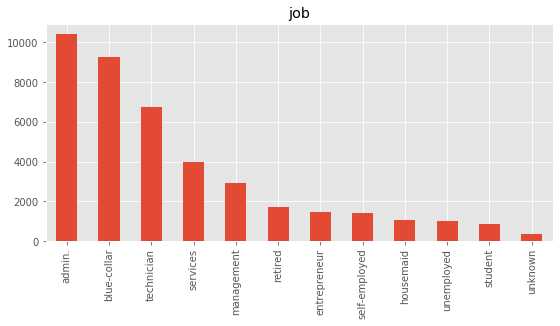

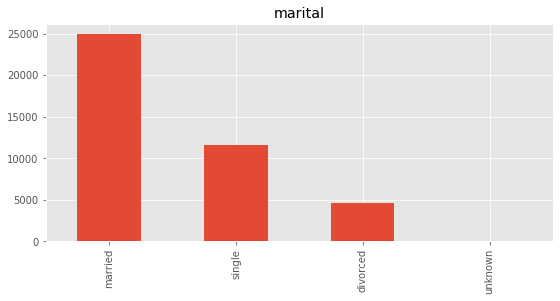

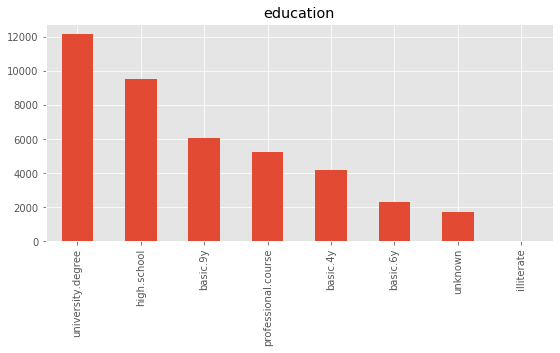

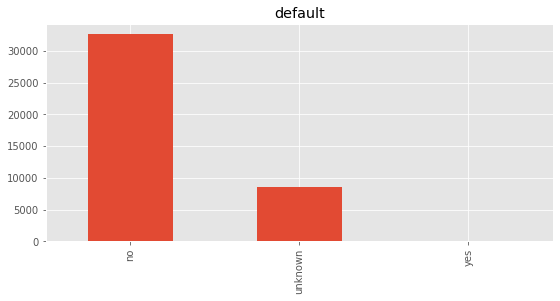

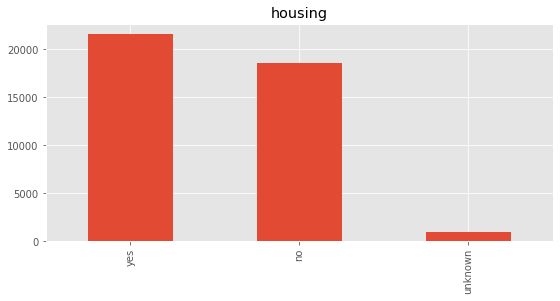

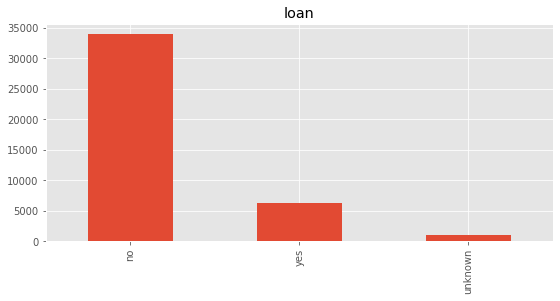

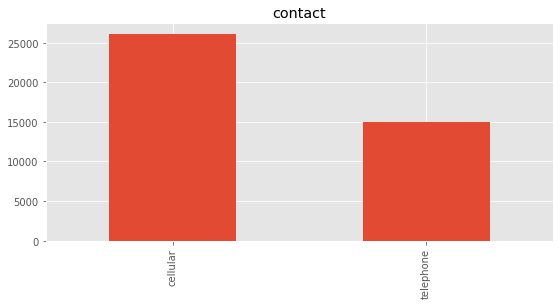

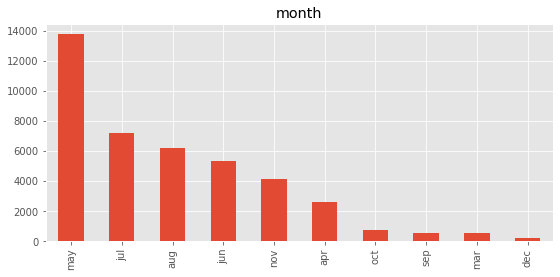

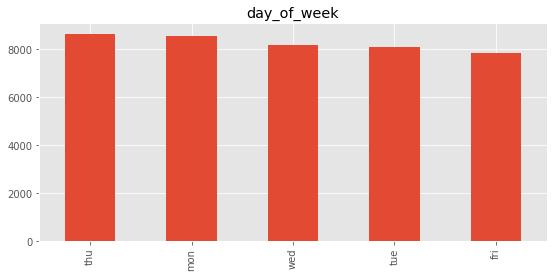

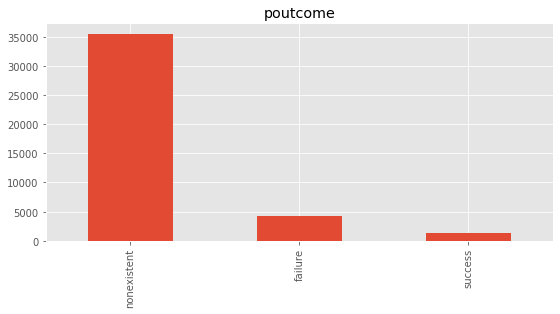

In [140]:
#Univariate analysis of Categorical columns
#Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.
# Selecting the categorical columns
categorical_col = dataframe.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    dataframe[column].value_counts().plot(kind='bar')
    plt.title(column)


In [141]:
#check missing values and impute them for categorical data with mode
for column in categorical_col:
    mode = dataframe[column].mode()[0]
    dataframe[column] = dataframe[column].replace('unknown',mode)

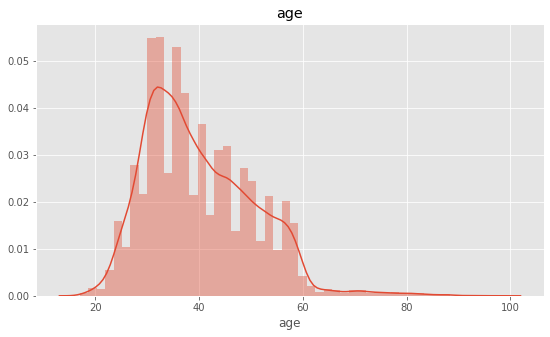

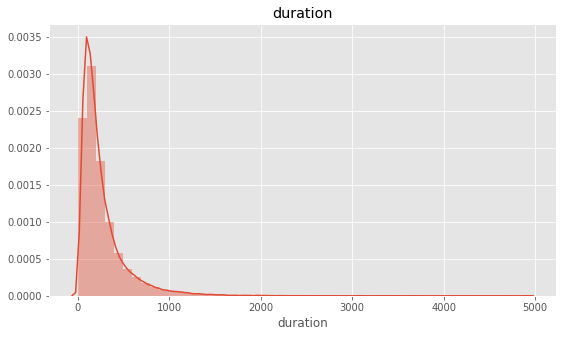

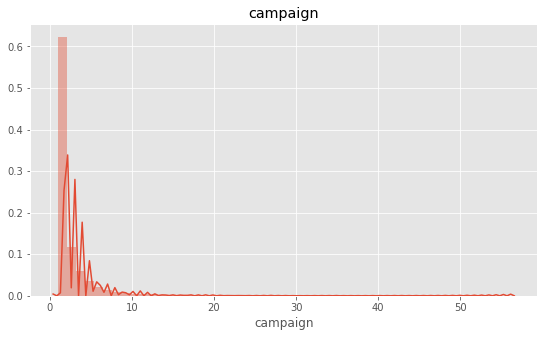

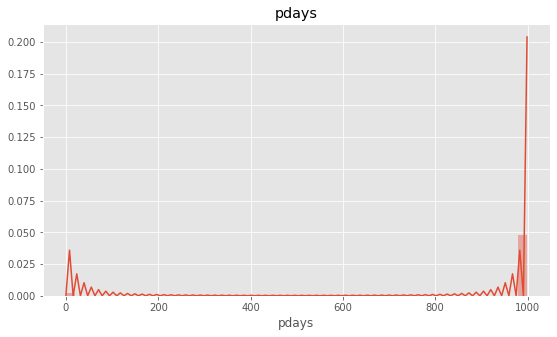

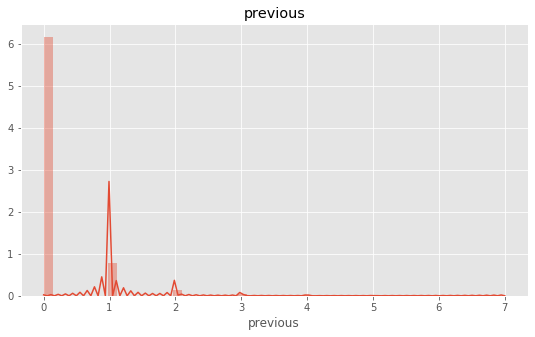

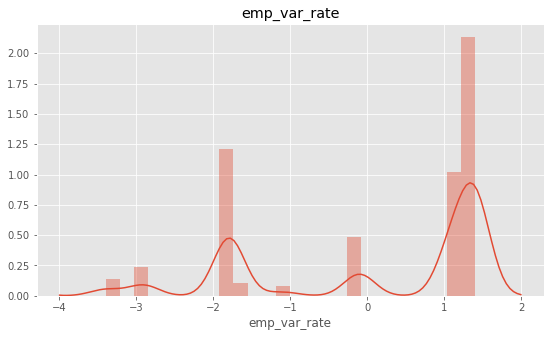

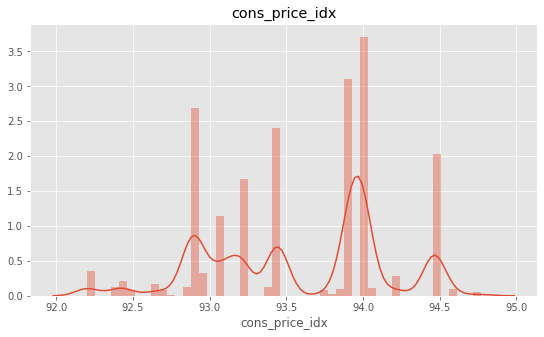

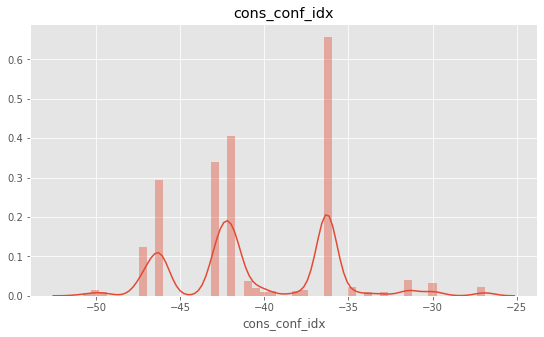

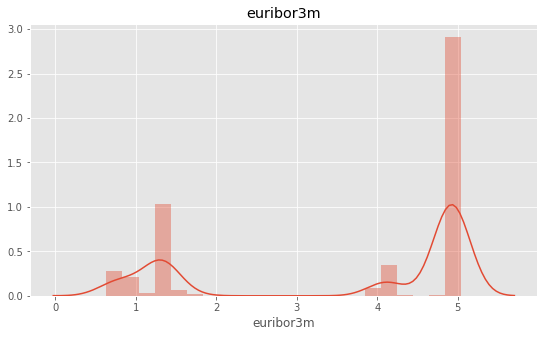

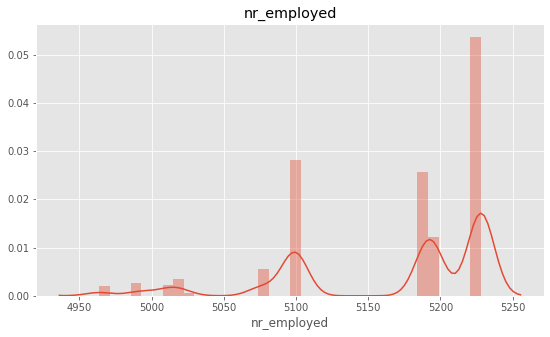

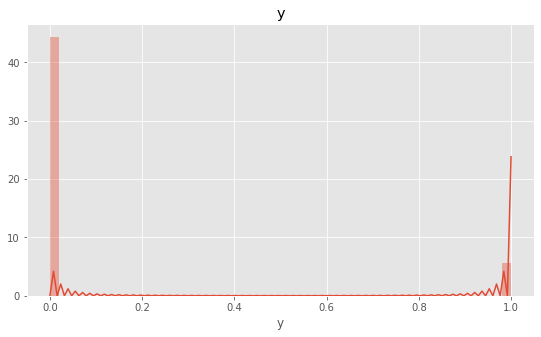

In [142]:
#Univariate analysis of Continuous columns
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(dataframe[column])
    plt.title(column)

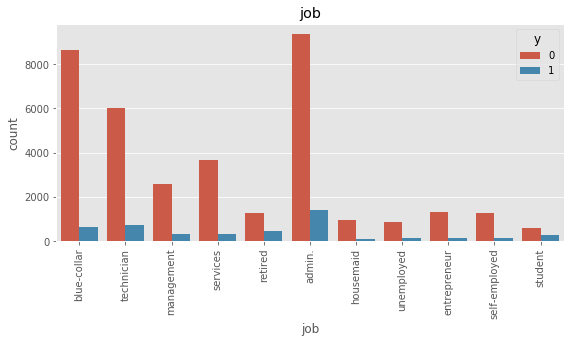

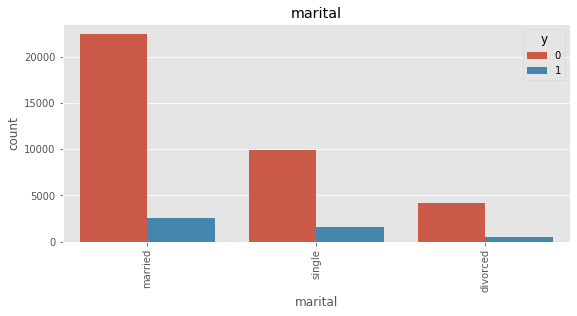

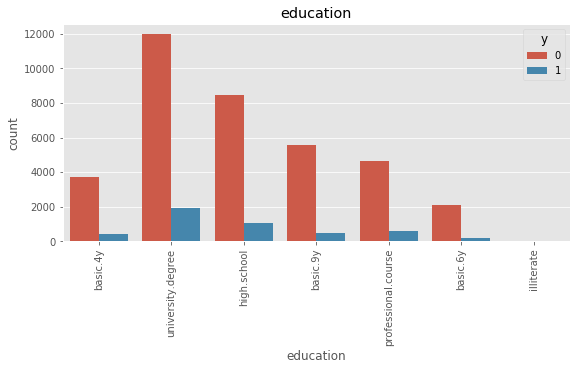

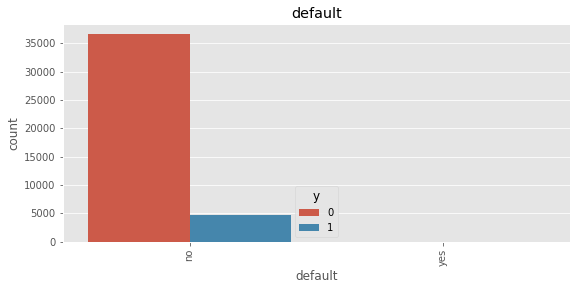

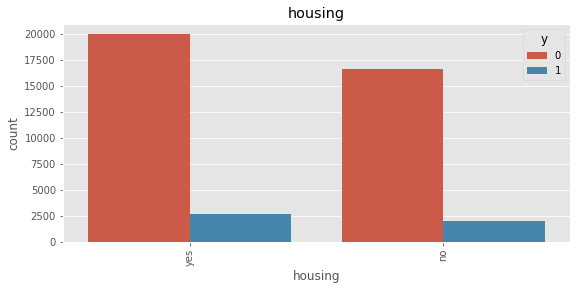

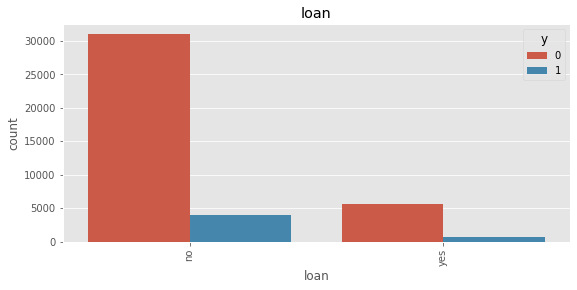

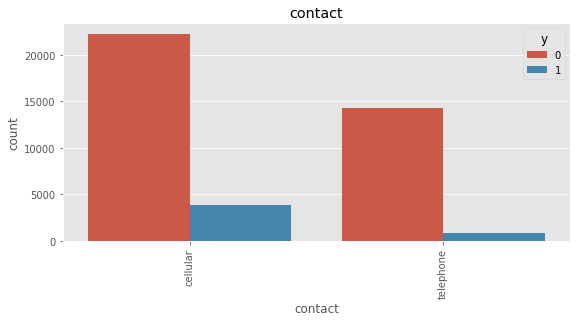

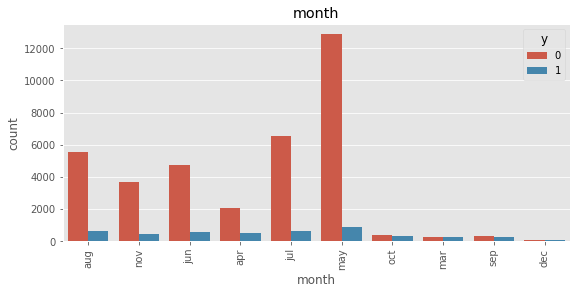

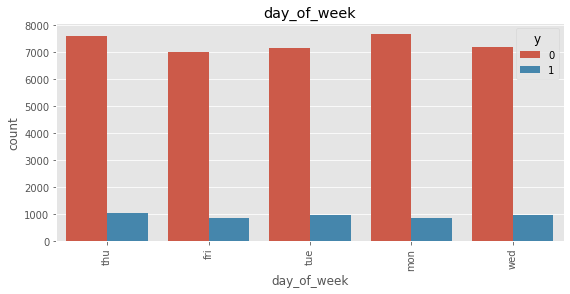

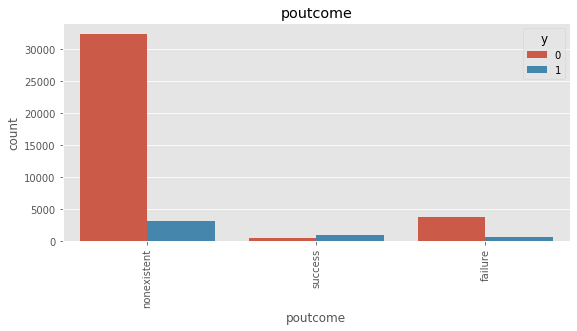

In [143]:
#Bivariate Analysis - Categorical Columns
#Bivariate analysis involves checking the relationship between two variables simultaneously. In the code below, we plot every categorical feature against the target by plotting a barchart.

for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=dataframe[column],hue=dataframe['y'],data=dataframe)
    plt.title(column)    
    plt.xticks(rotation=90)

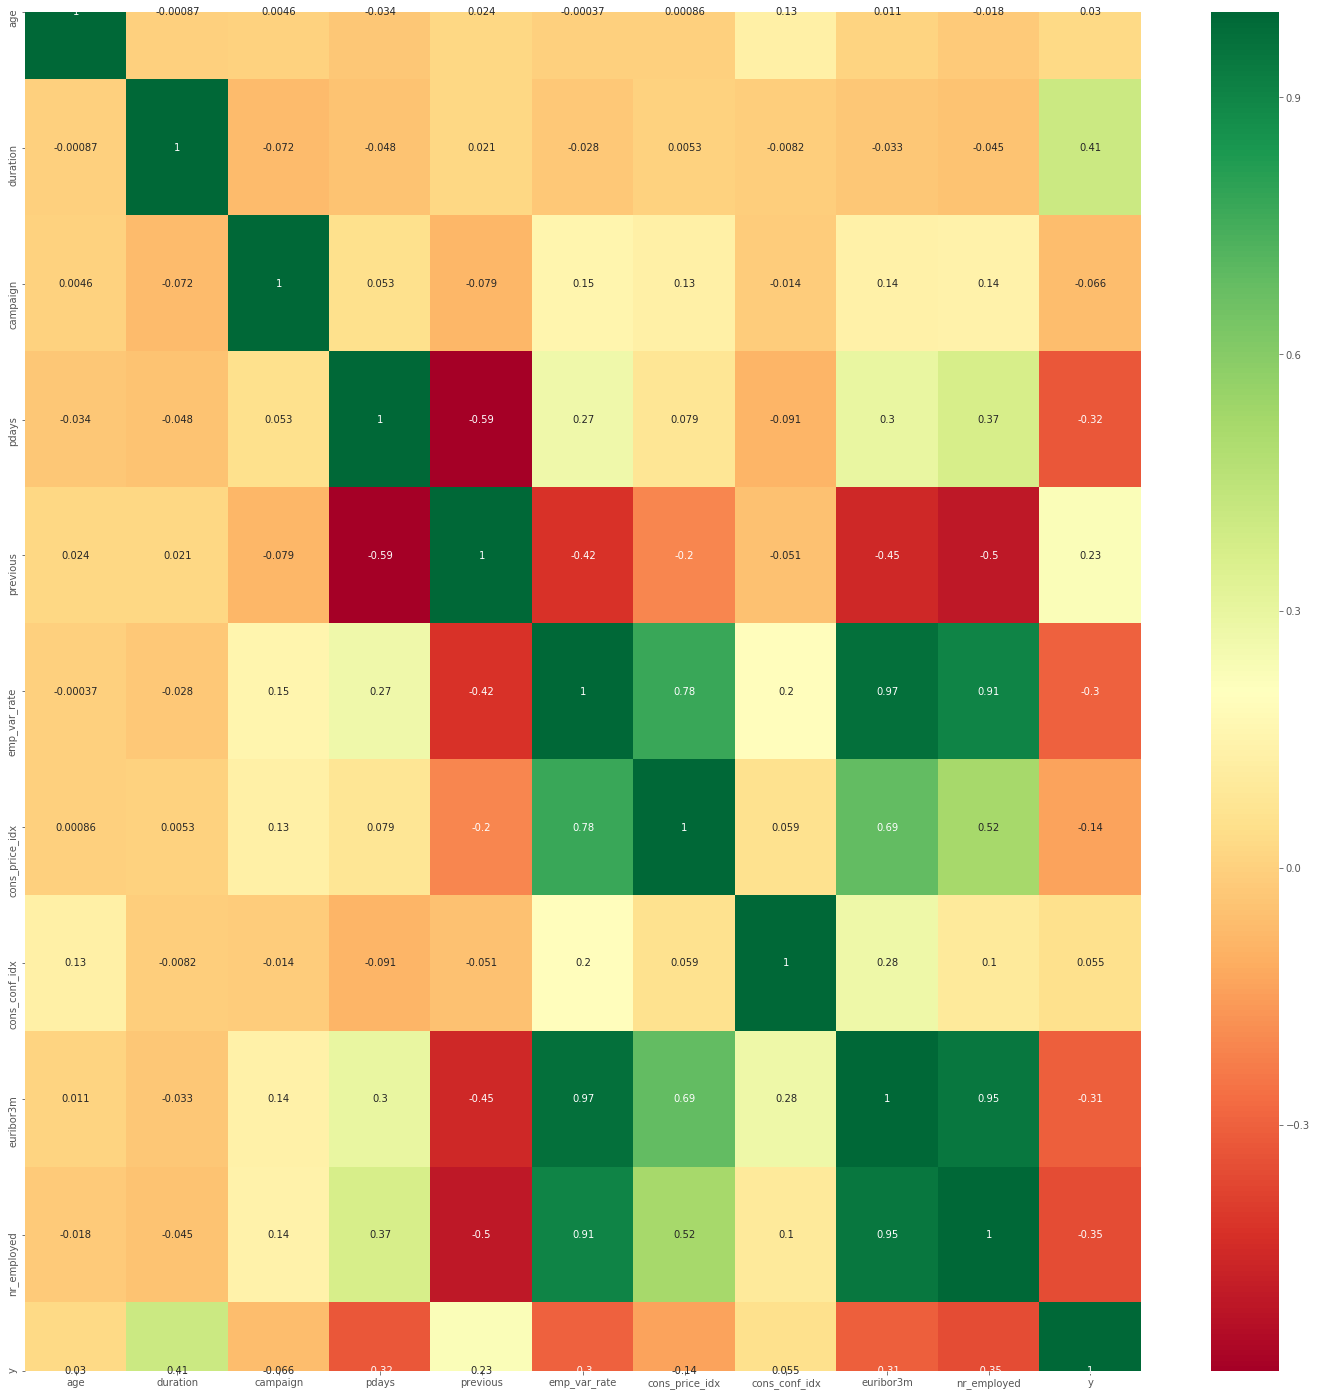

In [144]:
new_data= dataframe.copy()
#Finding correlation between each columns by using heatmap
plt.figure(figsize = (25,25))
sns.heatmap(new_data.corr(), cmap = "RdYlGn", annot = True)

In [145]:
#Function to Label Encode Categorical variables.
#scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. 
#coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.
#One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. 


le = LabelEncoder()

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        dataframe[feature] = le.fit_transform(dataframe[feature])
    except:
        print('Error encoding '+feature)

In [ ]:
#remove outliers from the df
def remove_outlier(data,column):
    Q3 = dataframe[column].quantile(.75)
    Q1 = dataframe[column].quantile(.25)
    IQR = Q3-Q1
    dataframe = dataframe[~((dataframe[column] < (Q1 - 1.5 * IQR)) |(dataframe[column] > (Q3 + 1.5 * IQR)))]
    return dataframe

In [146]:
#save the preprocessed data into new csv file.
dataframe.to_csv('banking_details.csv',index=False)

In [147]:
#Load the Preprocessed dataset
banking_details = pd.read_csv('banking_details.csv')
print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,0,1,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,6,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,1,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,1,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [148]:
#Since we have label encoded our categorical variables, our data is now ready for applying machine learning algorithms.

#PREPARING THE TRAIN AND TEST DATA
# Predictors
X = banking_details.iloc[:,:-1]# select all columns without last column
# Target
y = banking_details.iloc[:,-1]  #selects last column alone

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
#FITTING THE MODEL AND PREDICTING THE VALUES
# run Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

#Predicting the test set results and creating confusion matrix
y_pred = classifier.predict(x_val)
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)


[[7085  210]
 [ 555  388]]


The result is telling us that we have 7085+210 correct predictions and 555+388 incorrect predictions.

In [150]:
#Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.91


In [151]:
#classfication report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.65      0.41      0.50       943

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [157]:
#Check the prediction of model on a new file created without y col.
new_input_test = pd.read_csv("Bank_test.csv")
#check for categorical and numerical values
#Check Numeric and Categorical Features

numeric_data = new_input_test.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns # we will store the numeric features in a variable

categorical_data = new_input_test.select_dtypes(exclude=np.number) # we will exclude data with categorical features
categorical_col = categorical_data.columns  
#label encoding
le = LabelEncoder()

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        new_input_test[feature] = le.fit_transform(new_input_test[feature])
    except:
        print('Error encoding '+feature)
        
        

y_pred_result_new = classifier.predict(new_input_test)

print(y_pred_result_new)

[0 0 0 1 0]
